In [142]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, MinMaxScaler, LabelBinarizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.model_selection import cross_val_score


In [143]:
# Loading the dataset
bank_data = pd.read_csv('bank-additional-full.csv', sep=';')

# Displaying the total number of data
print('Total Number of samples:',len(bank_data))

# Displaying dataset
bank_data.head()

Total Number of samples: 41188


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# **Data Processing**

In [144]:
# Checking for missing values
missing_values = bank_data.isnull().sum()

# Displaying missing values
print("Missing Values:")
print(missing_values[missing_values > 0])

Missing Values:
Series([], dtype: int64)


In [145]:
# Checking duplicates data
print("The number of duplicate data: ")
bank_data.duplicated().sum()

The number of duplicate data: 


12

In [146]:
# Dropping duplicates data
bank_data.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [147]:
# Displaying the column of dataset
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# **Exploratory Data Analysis (EDA)**

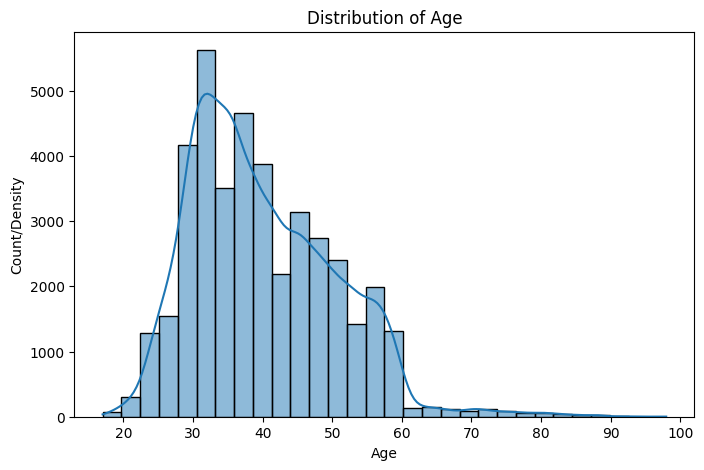

In [148]:
# Distribution of Client's Age

plt.figure(figsize=(8, 5))
sns.histplot(bank_data['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count/Density')
plt.show()


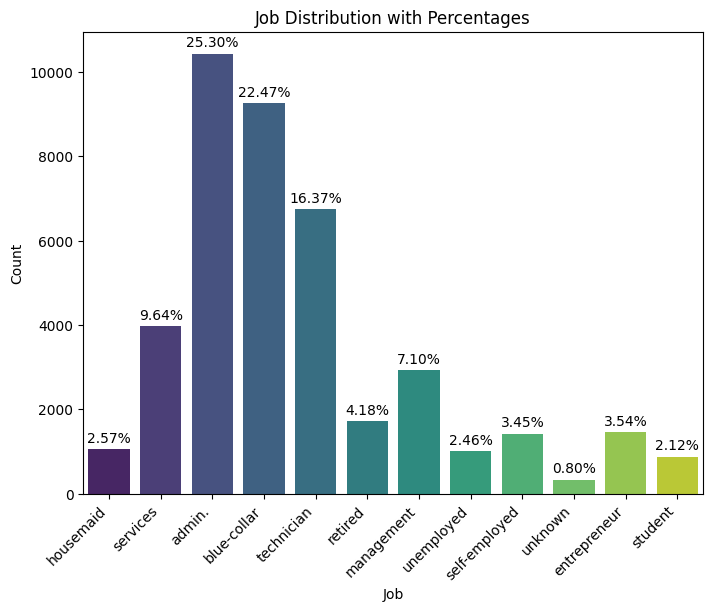

In [149]:
# Distribution of Job

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='job', hue= 'job', data=bank_data, palette='viridis')

# Calculate total number of data points
total_data_points = len(bank_data)

# Annotate percentages on top of each bar
for p in ax.patches:
    percentage = p.get_height() / total_data_points * 100
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Job Distribution with Percentages')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

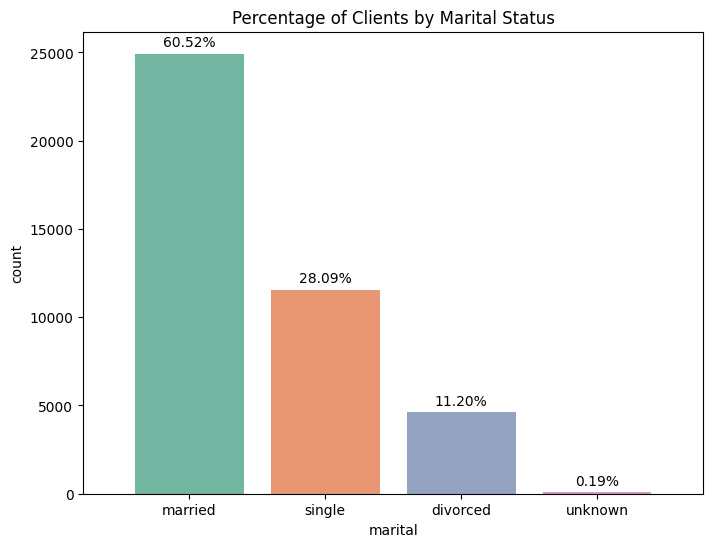

In [150]:
# Distribution of marital status

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='marital', hue='marital', data=bank_data, palette='Set2')

# Annotate percentages on top of each bar
total = len(bank_data['marital'])
for p in ax.patches:
    percentage = p.get_height() / total * 100
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Adjust the spacing between bars
ax.margins(x=0.1)

plt.title("Percentage of Clients by Marital Status")
plt.show()

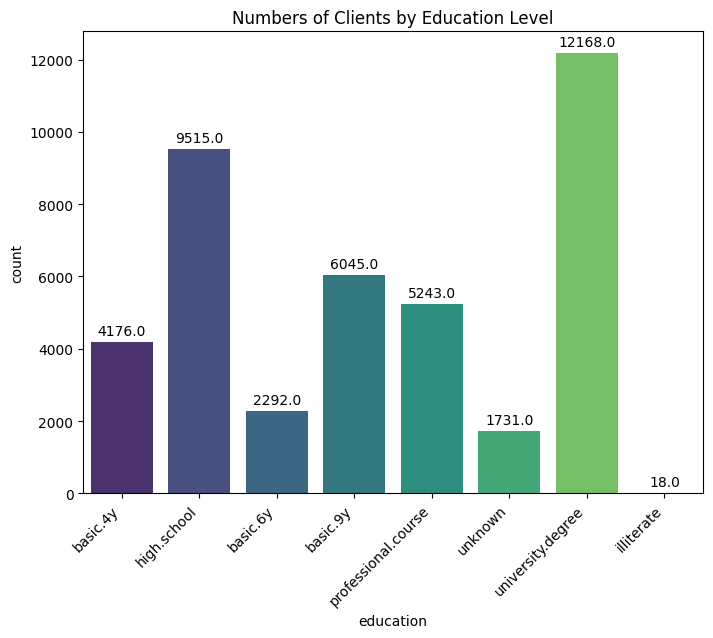

In [151]:
# Distribution of education level

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='education', hue='education', data=bank_data, palette='viridis', legend=False)

# Annotate counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title("Numbers of Clients by Education Level")
plt.xticks(rotation=45, ha='right')
plt.show()

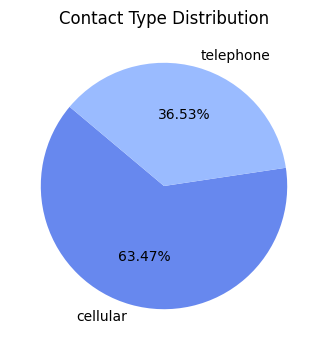

In [152]:
# Distribution of contact type

plt.figure(figsize=(6, 4))

# Count the occurrences of each contact type
contact_counts = bank_data['contact'].value_counts()

# Create a pie chart
plt.pie(contact_counts, labels=contact_counts.index, autopct='%1.2f%%', startangle=140, colors=sns.color_palette('coolwarm'))

plt.title('Contact Type Distribution')
plt.show()

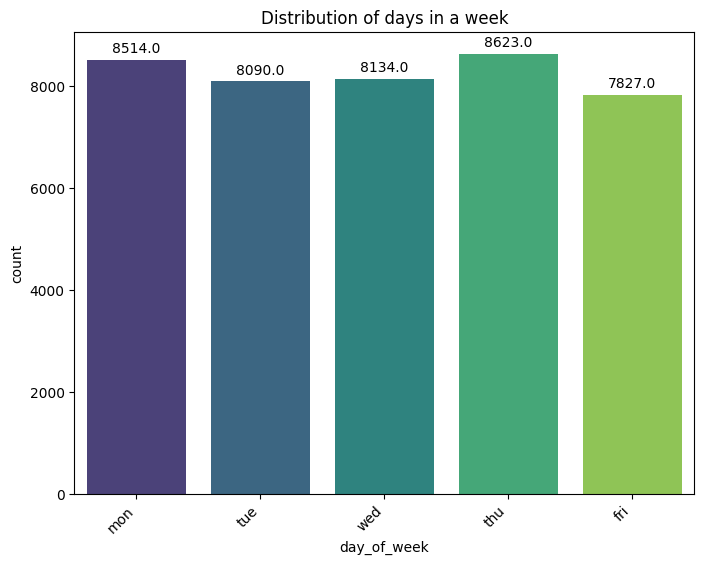

In [153]:
# Distribution of days in a week

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='day_of_week', hue='day_of_week', data=bank_data, palette='viridis', legend=False)

# Annotate counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title("Distribution of days in a week")
plt.xticks(rotation=45, ha='right')
plt.show()

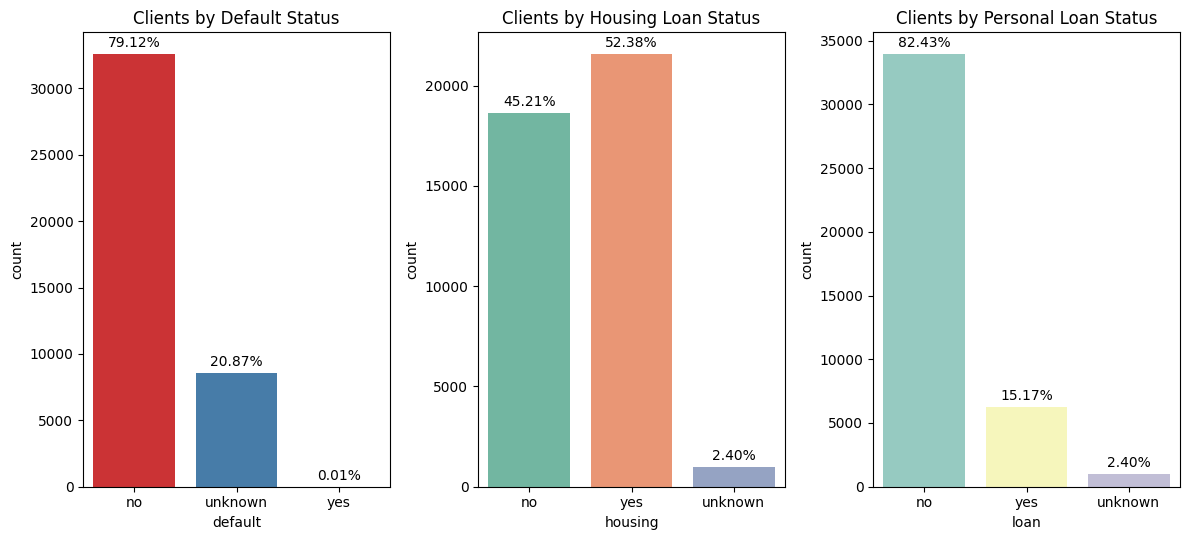

In [154]:
# Set the figure size
plt.figure(figsize=(12, 5.5))

# Plot countplots for 'default,' 'housing,' and 'loan' with different colors
plt.subplot(1, 3, 1)
ax1 = sns.countplot(x='default', hue='default', data=bank_data, palette='Set1')
plt.title('Clients by Default Status')

# Annotate percentages on top of each bar for the first subplot
total1 = len(bank_data['default'])
for p in ax1.patches:
    percentage = p.get_height() / total1 * 100
    ax1.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

plt.subplot(1, 3, 2)
ax2 = sns.countplot(x='housing', hue='housing', data=bank_data, palette='Set2')
plt.title('Clients by Housing Loan Status')

# Annotate percentages on top of each bar for the second subplot
total2 = len(bank_data['housing'])
for p in ax2.patches:
    percentage = p.get_height() / total2 * 100
    ax2.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

plt.subplot(1, 3, 3)
ax3 = sns.countplot(x='loan', hue='loan', data=bank_data, palette='Set3')
plt.title('Clients by Personal Loan Status')

# Annotate percentages on top of each bar for the third subplot
total3 = len(bank_data['loan'])
for p in ax3.patches:
    percentage = p.get_height() / total3 * 100
    ax3.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

plt.tight_layout()
plt.show()

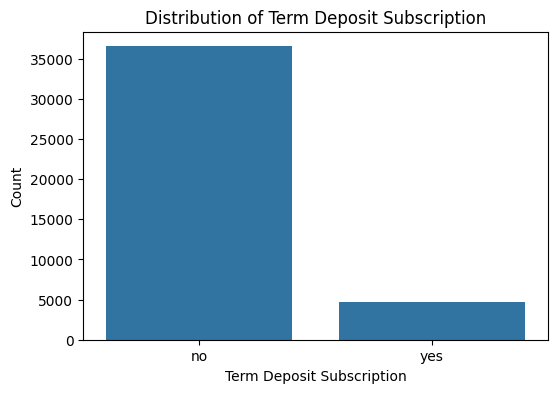

In [155]:
# Create a count plot to visualize the distribution of 'y'
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=bank_data)
plt.title('Distribution of Term Deposit Subscription')
plt.xlabel('Term Deposit Subscription')
plt.ylabel('Count')
plt.show()

In [156]:
# List of Numerical column
numerical_cols = list(bank_data.select_dtypes(exclude=['object']))
print('List of Numerical Column')
numerical_cols



List of Numerical Column


['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [157]:
# List of Categorical column
category_cols = list(bank_data.select_dtypes(include=['object']))
print('List of Categoricl Column')
category_cols

List of Categoricl Column


['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

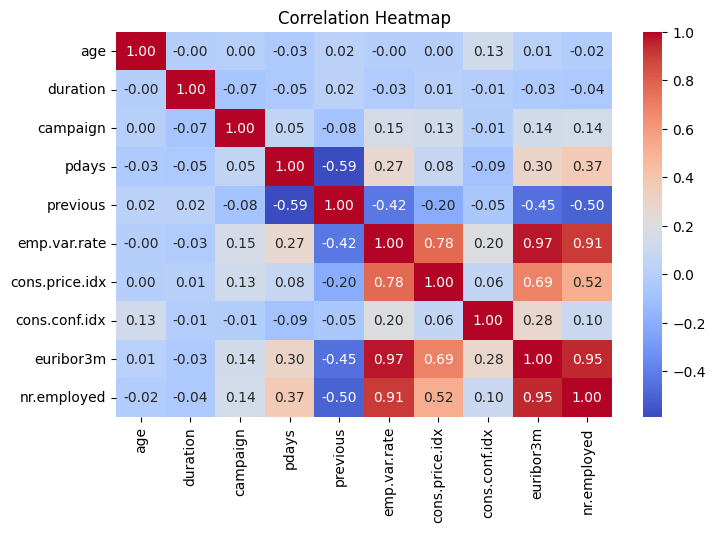

In [158]:
# Correlation between numeric columns

plt.figure(figsize=(8, 5))
corr = bank_data[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [159]:
# Drop 'duration' column
bank_data = bank_data.drop('duration', axis=1)

In [160]:
# Displaying the columns name from the dataset
print(bank_data.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [161]:

df=bank_data
# Convert categorical variables using one-hot encoding
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Separate features and target variable
X = df.drop(columns=['y'])
y = df['y']

# Apply min-max scaling to ensure all features are non-negative
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Feature selection
k = 25
selector = SelectKBest(score_func=chi2, k=k)
X_selected = selector.fit_transform(X_scaled, y)

# Get selected feature indices
selected_indices = selector.get_support(indices=True)

# Get selected feature names
selected_features = X.columns[selected_indices]

print("Selected Features:")
print(selected_features)

Selected Features:
Index(['pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'euribor3m',
       'nr.employed', 'job_blue-collar', 'job_retired', 'job_services',
       'job_student', 'marital_married', 'marital_single',
       'education_basic.6y', 'education_basic.9y',
       'education_university.degree', 'default_unknown', 'contact_telephone',
       'month_dec', 'month_jul', 'month_mar', 'month_may', 'month_oct',
       'month_sep', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')


In [162]:
# Checking the data after using one-hot encoding
df.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,...,1,0,0,0,1,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,...,1,0,0,0,1,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,...,1,0,0,0,1,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,...,1,0,0,0,1,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,...,1,0,0,0,1,0,0,0,1,0


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   campaign                       41188 non-null  int64  
 2   pdays                          41188 non-null  int64  
 3   previous                       41188 non-null  int64  
 4   emp.var.rate                   41188 non-null  float64
 5   cons.price.idx                 41188 non-null  float64
 6   cons.conf.idx                  41188 non-null  float64
 7   euribor3m                      41188 non-null  float64
 8   nr.employed                    41188 non-null  float64
 9   y                              41188 non-null  object 
 10  job_blue-collar                41188 non-null  uint8  
 11  job_entrepreneur               41188 non-null  uint8  
 12  job_housemaid                  41188 non-null 

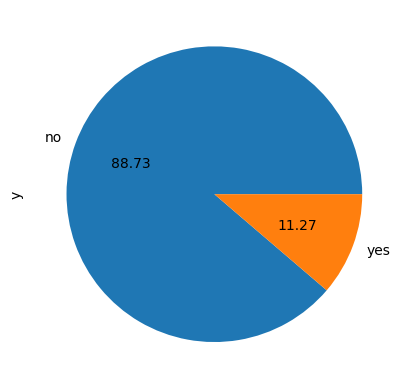

In [164]:
ax= y.value_counts().plot.pie(autopct='%.2f')

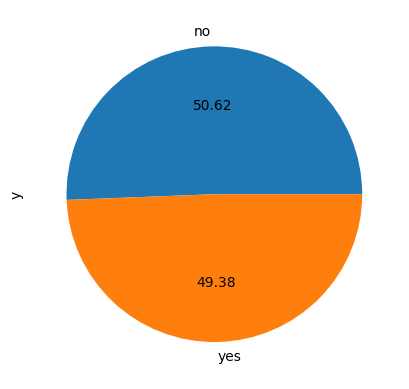

In [165]:
# Oversampling with ADASYN
ada = ADASYN(random_state=42)
X, y = ada.fit_resample(X, y)
data_oversampled = pd.concat([X, y], axis=1)
data_oversampled.dropna(axis=0, inplace=True)
X = data_oversampled.drop(['y'], axis=1)
y = data_oversampled['y']
ax= y.value_counts().plot.pie(autopct='%.2f')

In [166]:
X.isnull().sum()

age                              0
campaign                         0
pdays                            0
previous                         0
emp.var.rate                     0
cons.price.idx                   0
cons.conf.idx                    0
euribor3m                        0
nr.employed                      0
job_blue-collar                  0
job_entrepreneur                 0
job_housemaid                    0
job_management                   0
job_retired                      0
job_self-employed                0
job_services                     0
job_student                      0
job_technician                   0
job_unemployed                   0
job_unknown                      0
marital_married                  0
marital_single                   0
marital_unknown                  0
education_basic.6y               0
education_basic.9y               0
education_high.school            0
education_illiterate             0
education_professional.course    0
education_university

# **Model Training**

In [167]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Model 1: Decision Tree Model**

In [168]:

# Create and train a Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tree = tree_model.predict(X_test)

# Evaluate the classifier
report = classification_report(y_test, y_pred_tree, output_dict=True)
print("Classification report for Decision Tree Classifier Model")

print(classification_report(y_test, y_pred_tree))


Classification report for Decision Tree Classifier Model
              precision    recall  f1-score   support

          no       0.90      0.88      0.89      7284
         yes       0.88      0.90      0.89      7158

    accuracy                           0.89     14442
   macro avg       0.89      0.89      0.89     14442
weighted avg       0.89      0.89      0.89     14442



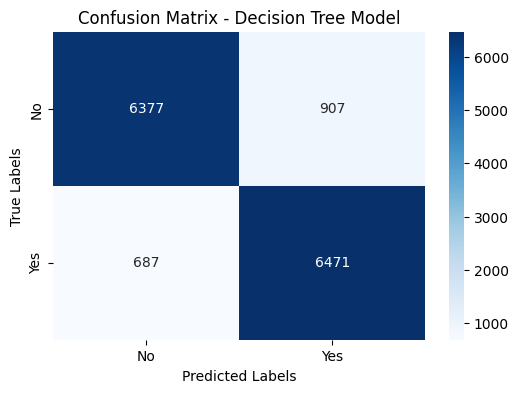

In [169]:
# Confusion matrix for Decision Tree model
logistic_conf_matrix = confusion_matrix(y_test, y_pred_tree)

# Plot confusion matrix for Decision Tree model
plt.figure(figsize=(6, 4))
sns.heatmap(logistic_conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - Decision Tree Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# **Model 2: Random Forest Classifier**

In [170]:

# Create Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

# Evaluate the classifier
report = classification_report(y_test, rf_pred, output_dict=True)
print("Classification report for Random Forest Classifier")

print(classification_report(y_test, rf_pred))


Classification report for Random Forest Classifier
              precision    recall  f1-score   support

          no       0.93      0.93      0.93      7284
         yes       0.93      0.92      0.93      7158

    accuracy                           0.93     14442
   macro avg       0.93      0.93      0.93     14442
weighted avg       0.93      0.93      0.93     14442



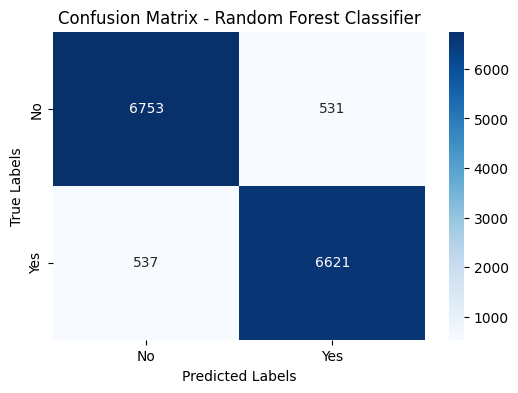

In [171]:
# Confusion matrix for Random Forest Classifier
logistic_conf_matrix = confusion_matrix(y_test, rf_pred)

# Plot confusion matrix for Random Forest Classifier
plt.figure(figsize=(6, 4))
sns.heatmap(logistic_conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - Random Forest Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

***ROC And AUC between two model***

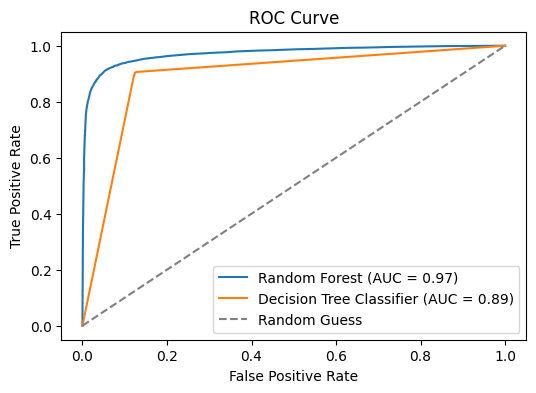

In [172]:
# Convert labels to binary format
label_binarizer = LabelBinarizer()
y_test_binary = label_binarizer.fit_transform(y_test)

# Calculate ROC curve and AUC for Random Forest Classifier
rf_probs = rf_clf.predict_proba(X_test)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(y_test_binary, rf_probs)
rf_roc_auc = auc(rf_fpr, rf_tpr)

# Calculate ROC curve and AUC for Gradient Boosting Classifier
tree_probs = tree_model.predict_proba(X_test)[:, 1]
tree_fpr, tree_tpr, _ = roc_curve(y_test_binary, tree_probs)
tree_roc_auc = auc(tree_fpr, tree_tpr)

# Plot ROC curves
plt.figure(figsize=(6, 4))
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = {:.2f})'.format(rf_roc_auc))
plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier (AUC = {:.2f})'.format(tree_roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

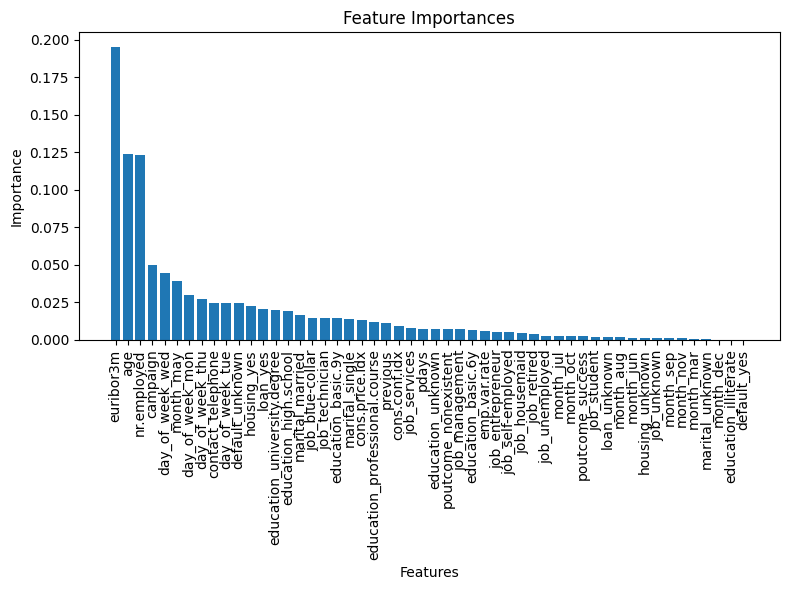

In [173]:
# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the data
dt_classifier.fit(X, y)

# Get feature importances
importances = dt_classifier.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Get the names of the features
feature_names = X.columns

# Plot the feature importances
plt.figure(figsize=(8, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

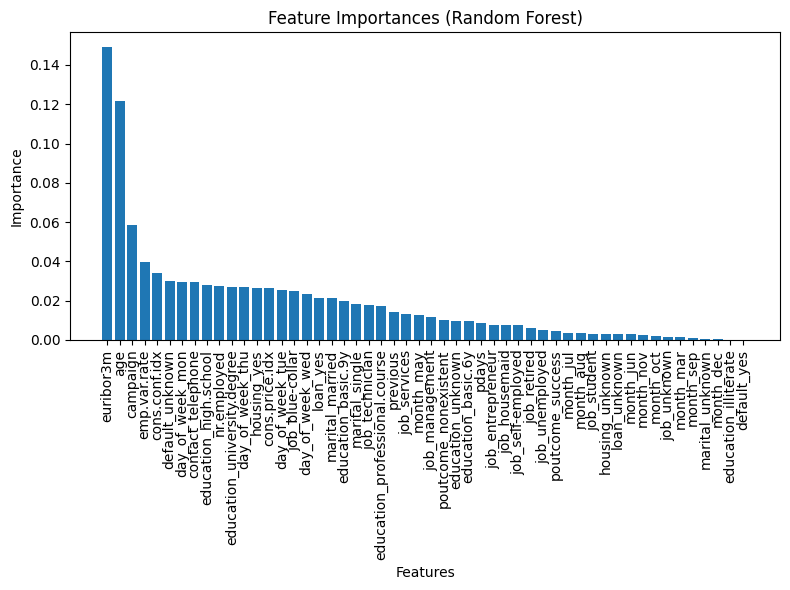

In [174]:
# Get feature importances
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

importances = rf_classifier.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Get the names of the features
feature_names = X.columns

# Plot the feature importances
plt.figure(figsize=(8, 6))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

Decision Tree Confusion Matrix:
[[36444   104]
 [  200 35458]]

Random Forest Confusion Matrix:
[[36391   157]
 [  147 35511]]


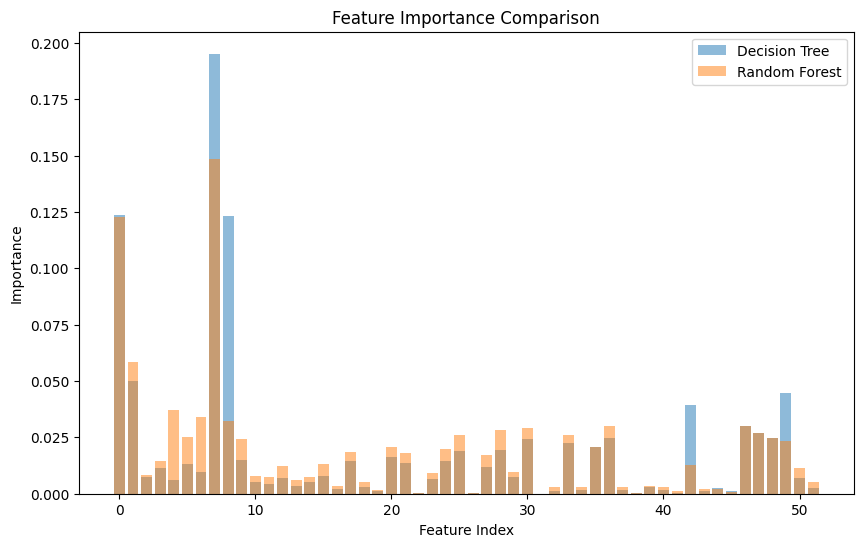

In [175]:
# Initialize Decision Tree and Random Forest classifiers
dt_classifier = DecisionTreeClassifier(random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)

# Train both models on the entire dataset
dt_classifier.fit(X, y)
rf_classifier.fit(X, y)


# Compare confusion matrices
dt_conf_matrix = confusion_matrix(y, dt_classifier.predict(X))
rf_conf_matrix = confusion_matrix(y, rf_classifier.predict(X))

print("Decision Tree Confusion Matrix:")
print(dt_conf_matrix)

print("\nRandom Forest Confusion Matrix:")
print(rf_conf_matrix)

# Compare feature importance
dt_importance = dt_classifier.feature_importances_
rf_importance = rf_classifier.feature_importances_

plt.figure(figsize=(10, 6))
plt.bar(range(len(dt_importance)), dt_importance, label='Decision Tree', alpha=0.5)
plt.bar(range(len(rf_importance)), rf_importance, label='Random Forest', alpha=0.5)
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Feature Importance Comparison')
plt.legend()
plt.show()

# **Model 3: Gradient Boosting Classifier**

In [176]:

# Train a classifier on the oversampled training data
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_clf.predict(X_test)

# Evaluate the classifier
report_gb = classification_report(y_test, y_pred, output_dict=True)

print(classification_report(y_test, y_pred))

# Displaying the metrics
print(f"Gradient Boosting Classifier Metrics:")
print(f"Accuracy: {report_gb['accuracy']:.3f}")
print(f"Precision: {report_gb['weighted avg']['precision']:.3f}")
print(f"Recall: {report_gb['weighted avg']['recall']:.3f}")
print(f"F1 Score: {report_gb['weighted avg']['f1-score']:.3f}")



              precision    recall  f1-score   support

          no       0.84      0.87      0.86      7284
         yes       0.86      0.83      0.85      7158

    accuracy                           0.85     14442
   macro avg       0.85      0.85      0.85     14442
weighted avg       0.85      0.85      0.85     14442

Gradient Boosting Classifier Metrics:
Accuracy: 0.852
Precision: 0.852
Recall: 0.852
F1 Score: 0.852
